# Theory

## What is concept learning, explain with an example?
Concept learning is the process of acquiring the definition of a general category given a sample of positive and negative training samples of the category. More specifically, we want to approximate a boolean-valued function from examples of input and output. 

Consider the example below.

|  animal  | has vertebrae | lay eggs | has hair | is mammal |
|----------|---------------|----------|----------|-----------|
| salmon   |      yes      |   yes    |   no     |    no     |
| dog      |      yes      |   no     |   yes    |    yes    |
| platypus |      yes      |   yes    |   yes    |    yes    |
| tiger    |      yes      |   no     |   yes    |    yes    |
| lizzard  |      yes      |   yes    |   no     |    no     |
| dolphin  |      yes      |   no     |   yes    |    yes    |

(Yes, the dolphin does actually have hair(mustache) http://www.nmmf.org/fun-facts-for-students.html)

Concept learning in this case, is the process of automatically inferring the general definition of a mammal from the known examples of animals. Given the simplified nature of the example we can see that the "Has hair"-feature is actually able to provide the definition by itself. Thus, the concept we can ifer is: If an animal has hair, it is a mammal. This definition is actually true for all animals.


## What is function approximation and why do we need them?

Consider an ideal target function that perfectly maps every input of to the best possible output. 
_Function approximation_ is the process of learning this target function.

The ideal target function is often not efficiently computable (_nonoperational_), so we want to approximate this ideal target function, or discover an _operational_ description of it so that we can evaluate the inputs within realistic time bounds. 


## What is _inductive bias_ in the context of machine learning, and why is it so important? Decision tree learning and candidate elimination algorithm are two different learning algorithms. What can you say about the inductive bias for each of them?
Inductive bias is the set of assumptions the learner makes about the target function that enables it to predict outputs from previously unseen inputs.

Without an inductive bias, the learner is unable to make inductive leaps to make predictions for unseen example, which in most cases is the motivation for learning in the first place. 

For the Candidate-Elimination Algorithm, the inductive bias as that the target concept is contained in the hypothesis space.  

For Decision tree learning, the inductive bias is: Shorter trees are preferred over longer trees. Trees that place high information gain attributes close to the root are preferred over those that do not. 


## What is _overfitting_, and how does it differ from _underfitting_? Briefly explain what a validation set is. How can cross-validation be used to mitigate overfitting? 
Overfitting is when a learner has high variance, and makes to many assumptions about the training data, which makes the learner model the noise in the training data, rather than the actual signal. Underfitting is when a learner makes too few assumptions about the training data, has high bias(1), and miss relevant relations between the inputs and outputs of the training data. 

(1) Estimator bias. Not to be confused with inductive bias.

These figures from the lecture slides illustrate the difference well:

![](ou.png "Over-and underfitting")

                Underfitting           Just right            Overfitting 

A validation set is a subset of the original training data, that can be withheld from the model during training, to evaluate the model's ability to generalize to unseen data. 

If a model achieves low error on the training data(excluding the validation set), but high on the validation set, it is overfitting. Using cross-validation, we can mitigate overfitting by choosing the model that achieves the lowest error on the validation set, rather than the training set. 


## Apply candidate elimination algorithm on the data given below in "Table 1", where {TreatmentSuccesful} is the target attribute. Describe on its version space, specific and general boundary.  

<br>  
![](a.png "Title")

Initially, the version space contains all possible hypotheses, H.
The G boundary is initialized to the most general hypothesis in H, and the S boundary is initialized to the most specific hypothesis in H.   
Every member of the version space lies between the S and G boundaries.  
$G_0 \leftarrow {(?,?,?,?)}$  
$S_0 \leftarrow {(\Phi,\Phi,\Phi,\Phi)}$  
<br>Training examples:  

1. &lt;Female, Back, Medium, Medium>, TreatmentSuccessful=Yes.
2. &lt;Female, Neck, Medium, High>, TreatmentSuccessful=Yes. 
3. &lt;Female, Shoulder, Low, Low>, TreatmentSuccessful=No.
4. &lt;Male, Neck, High, Medium>, TreatmentSuccessful=Yes. 
5. &lt;Male, Back, Medium, Low>, TreatmentSuccessful=Yes.  

For example 1, we must first check if there are any hypothesis in G that are inconsistent with the sample. 
At this point, G classifies all examples as positive, thus no hypothesis are inconsistent with a positive sample.  
<br>S will be generalized to include the first example:  
<br><br>$S_1 \leftarrow {(Female, Back, Medium, Medium)}$  
$G_1 \leftarrow {(?,?,?,?)}$  
<br>G still classifies all as positive, and does not change. 
S must be further generalized to include the second example.  
<br><br>$S_2 \leftarrow {(Female, ?, Medium, ?)}$  
$G_2 \leftarrow {(?,?,?,?)}$  
<br>Now, we have a negative example. S correctly classifies this as a negative example, and need not to be changed.
We must then specialize G, so that the negative example is correctly excluded from the version space.
<br><br>$S_3 \leftarrow {(Female,?,Medium,?)}$  

We have two possible minimal specializations of G:

$G_3 \leftarrow {(Female,?,?,?),(?,?,Medium,?)}$  

In order to correctly classify example 3 as negative, the first hypothesis must be pruned. 

Thus, the only hypothesis, h, that is consistent with example 3, and is a minimal specialization of G, and some member of S is more specific than h is:  

$G_3 \leftarrow {(?,?,Medium,?)}$  

<br>For our fourth example, we must remove from G all hypothesis inconsistent with this example. Our only hypothesis for G will then be pruned, and we are left with an empty set for G. That also means that S will be reduced to the empty set, since all its hypothesis are inconsistent with this example, and there are no generalizations of S that has a more general member in G, as G is now an empty set.  
<br>Conclusion: G can not be further specialized, S can not be further generalized. There are no members left in the version space.  
This means our version space has collapsed, and that we are not able to represent this dataset through the use of candidate-elimination method with constraints of conjunctive hypothesis.  
There is no need to proceed with candidate eliminiation after the fourth example.

# Programming

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Implement linear regression with ordinary least squares (OLS) using the closed-form solution seen in Equation 9

In [2]:
def linear_regression(x, y):
    '''
    Closed form linear regression according to Eq. 9 in the assignment. 
    '''
    weights = np.linalg.pinv(x.transpose().dot(x)).dot(x.transpose()).dot(y)
    return weights

## Load the data in train_2d_reg_data.csv (training data) and test_2d_reg_data.csv (test data) and use your OLS implementation to find a set of good weights for the training data. Show the weights as well as the model error $E_(mse)(w)$ for the training and test set after training. Is your model generalizing well?

In [200]:
train = pd.read_csv("datasets/regression/train_2d_reg_data.csv", header=None).values
test = pd.read_csv("datasets/regression/test_2d_reg_data.csv", header=None).values

In [201]:
def prep(data):
    '''
    Function to prep the data, by separating features and target, and adding an 
    intercept column to the features. 
    '''
    x = data[:,:-1]
    y = data[:, -1]
    # add intercept
    intercept = np.ones_like(x[:,0:1])
    x = np.concatenate([intercept, x], 1)
    return x, y

In [202]:
x_train, y_train = prep(train)
x_test, y_test = prep(test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((325, 3), (325,), (175, 3), (175,))

In [203]:
weights = linear_regression(x_train, y_train)

In [204]:
weights

array([0.24079271, 0.48155686, 0.0586439 ])

In [205]:
def get_predictions(x, weights):
    '''
    Calculates the predictions for a dataset given 
    the calculated weights.
    '''
    return x.dot(weights)

def mse(y_preds, y_true):
    '''
    Caculates the mean squared error between
    the predictions and the ground truth.
    '''
    return np.mean((y_true-y_preds)**2)

### Get predictions for training set

In [206]:
train_preds = get_predictions(x_train, weights)

### Calculate mse for training set

In [207]:
mse(train_preds, y_train)

0.010386850731462317

### Get predictions for test set

In [208]:
test_preds = get_predictions(x_test, weights)

### Calculate mse for test set

In [209]:
mse(test_preds, y_test)

0.009529764450618915

We can see that the model generalizes well to the test set. 

## Load the data in train_1d_reg_data.csv and test_1d_reg_data.csv and use your OLS implementation to find a set of good weights for the training data. Using these weights, make a plot of the line fitting the data and show this in the report. Does the line you found fit the data well? If not, discuss in broad terms how this can be remedied. 

In [261]:
train = pd.read_csv("datasets/regression/train_1d_reg_data.csv", header=None).values
test = pd.read_csv("datasets/regression/test_1d_reg_data.csv", header=None).values

In [262]:
x_train, y_train = prep(train)
x_test, y_test = prep(test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((325, 2), (325,), (175, 2), (175,))

In [263]:
weights = linear_regression(x_train, y_train)

In [264]:
weights

array([0.1955866 , 0.61288795])

In [265]:
preds = get_predictions(x_train, weights)

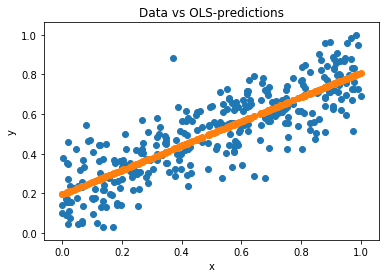

In [269]:
plt.title("Data vs OLS-predictions")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x_train[:,1], y_train)
plt.scatter(x_train[:,1], preds)

We can see that the line fits our data well. 

## Logistic regression

In [224]:
def sigmoid(z):
    '''
    Sigmoid function, Eq. 10 in assignment.
    '''
    return 1/(1+np.exp(-z))

In [229]:
def update_weights(x, y, w, eta):
    '''
    Weight update for gradient descent for logistic regression.
    Eq. 20 in assignment.
    '''
    preds = sigmoid(x.dot(w))
    w = w - (1/len(x))*eta*np.dot(x.T, preds-y)
    return w

In [226]:
def cross_entropy(x, y, w):
    '''
    The negative log-likelihood, or cross-entropy error function.
    Eq. 14 in assignment.
    '''
    preds = sigmoid(x.dot(w))
    ce = -1*(np.log(preds).T.dot(y)+np.log(1-preds).T.dot(1-y))
    return ce.sum()/len(y)

In [227]:
def binarize(probs):
    '''
    Function to binarize a probability prediction. 
    Returns 1 ifp>0.5, else 0.
    '''
    return (probs>0.5).astype(int)

In [228]:
def accuracy(preds, true):
    '''
    Vectorized function to evaluate accuracy, or fraction of correct credictions.
    '''
    return np.mean(preds == true)

### Load the data in cl_train_1.csv and cl_test_1.csv and use your logistic regression implementation to train on the data in the training set. Is the data linearly separable? Explain your reasoning. Additionally, show a plot of the cross-entropy error for both the training and test set over 1000 iterations oftraining. What learning rate η and initial parameters w did you select? Is your model generalising well?

In [271]:
train = pd.read_csv("datasets/classification/cl_train_1.csv", header=None).values
test = pd.read_csv("datasets/classification/cl_test_1.csv", header=None).values

In [272]:
x_train, y_train = prep(train)
x_test, y_test = prep(test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60, 3), (60,), (40, 3), (40,))

In [288]:
def logreg_train(x_train, y_train, x_test, y_test, lr=0.2, iterations=1000):
    '''
    Whole function to fit a logistic regression model to x_train and y_train. 
    We also save both training errors, testing errors, and accuracy, so we can 
    visualize the progression of the training. 
    '''
    weights = (2*np.random.random(x_train.shape[1]))-1
    tr_errors = []
    test_errors = []
    tr_a, test_a = [], []
    for i in range(iterations):
        weights = update_weights(x_train, y_train, weights, lr)
        tr_error = cross_entropy(x_train, y_train, weights)
        test_error = cross_entropy(x_test, y_test, weights)
        tr_errors.append(tr_error)
        test_errors.append(test_error)
        tr_acc = accuracy(binarize(sigmoid(x_train.dot(weights))), y_train)
        test_acc = accuracy(binarize(sigmoid(x_test.dot(weights))), y_test)
        tr_a.append(tr_acc)
        test_a.append(test_acc)
    return tr_errors, test_errors, tr_a, test_a, weights

In [289]:
tr_errors, test_errors, tr_a, test_a, weights = logreg_train(x_train, y_train, x_test, y_test)

In [277]:
def plot_errors(tr_errors, test_errors):
    plt.title("Training/testing error vs iterations")
    plt.xlabel("Iterations")
    plt.ylabel("Cross-entropy error")
    plt.plot(tr_errors, label="Training error")
    plt.plot(test_errors, label="Test error")
    plt.legend()

In [290]:
def plot_acc(tr_a, test_a):
    plt.title("Training/testing accuracy vs iterations")
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.plot(tr_a, label="Training accuracy")
    plt.plot(test_a, label="Test accuracy")
    plt.legend()

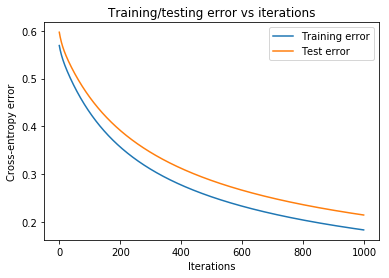

In [278]:
plot_errors(tr_errors, test_errors)

We can see that our model generalizes pretty well, but the test error is a bit higher than the training error. 

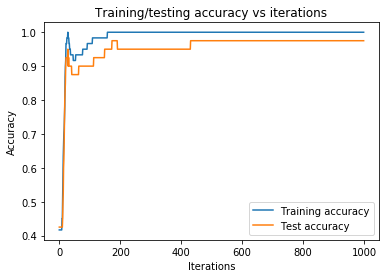

In [291]:
plot_acc(tr_a, test_a)

I chose a learning rate of 0.2, and randomly initialized the weights from an uniform distribution over $[-1,1)$

To plot our decision boundary, we set 
$w^Tx=0$ <br>
That gives us the non-vectorized equation: <br>
$w_0+w_1*x_0+w_2*x_1=0$ <br>
By solving for x1, we get x_1 as a function of x_0, where $w^Tx=0$: <br>
$x_1 = (-w_0-w_1*x_0)/w_2$ <br>
This enables us to plot our decision boundary. 
Note that we coud also represent our decision function as $\sigma(w^Tx)=0.5$ <br>
Because $\sigma(0)=0.5$, this would be equivalent. 

In [281]:
line = lambda x: (-weights[0]-weights[1]*x)/weights[2]

In [282]:
weights

array([ 2.48352078, -7.6308464 ,  4.17472707])

In [285]:
def plot_lin_db(train, linefunc):
    plt.title("Logistic regression data and decision boundary")
    pos = plt.scatter(train[np.where(train[:,2]>0),0], train[np.where(train[:,2]>0), 1], )
    neg = plt.scatter(train[np.where(train[:,2]==0),0], train[np.where(train[:,2]==0), 1])
    db = plt.scatter([0.01*i for i in range(100)], [[linefunc(0.01*i) for i in range(100)]], s=10)
    plt.legend((pos, neg, db),('Positive', 'Negative', 'Decision Boundary'))

I want to plot the decision boundary to visualize the results better. 
First, we can plot the decision boundary together with the training data.

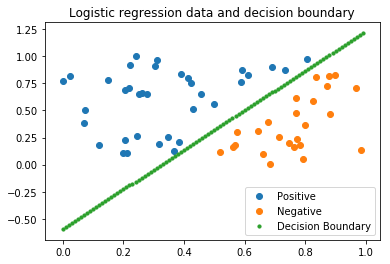

In [286]:
plot_lin_db(train, line)

We see that our model fits the training data perfectly, as our training accuracy also told us.  
The training data is _linearly separable_, as we can see a line is able to fully separate the two classes.  

How well does the model generalize to the test data?  
Lets make a plot of the models decision boundary along with the test data. 

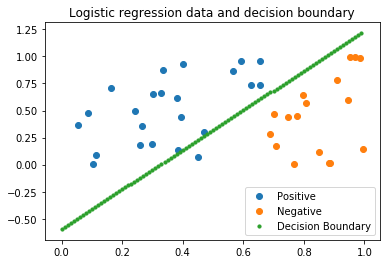

In [287]:
plot_lin_db(test, line)

We can see that it is a pretty good fit, but not quite perfect, as one point is misclassified. 

### Load the data in cl_train_s2.csv and cl_test_2.csv and use your logistic regression implementation to train on the data in the training set. Is the data linearly separable? Explain your reasoning. Plot the decision boundary as explained in the previous task as well as the data points in the training and test set. Discuss what can be done for logistic regression to correctly classify the dataset. Make the necessary changes to your implementation and show the new decision boundary in your report.

In [297]:
train = pd.read_csv("datasets/classification/cl_train_2.csv", header=None).values
test = pd.read_csv("datasets/classification/cl_test_2.csv", header=None).values

In [298]:
x_train, y_train = prep(train)
x_test, y_test = prep(test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60, 3), (60,), (40, 3), (40,))

In [302]:
tr_errors, test_errors, tr_a, test_a, weights = logreg_train(x_train, y_train, 
                                                  x_test, y_test, lr=0.1)

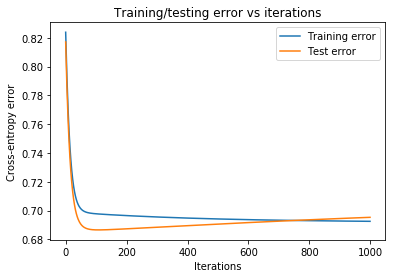

In [303]:
plot_errors(tr_errors, test_errors)

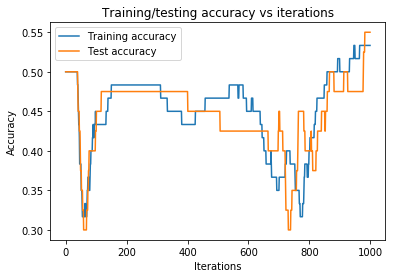

In [304]:
plot_acc(tr_a, test_a)

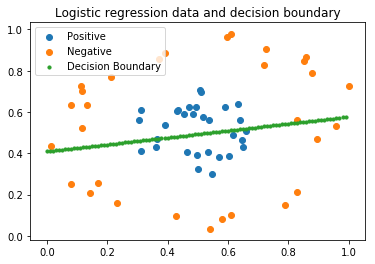

In [305]:
plot_lin_db(train, line)

We can see that this data is _not_ linearly separable. There exists no straight line that is able to separate the two classes in this two-dimensional feature space. To mitigate this, we can add polynomial interactions between the features. This will allow our model fit data that is not only linearly separable, but separable by a function given by the order of the polynomial features we add. 

In [306]:
def add_poly_features(x, order=2):
    '''
    Add polynomial interactions between the two feature columns x[:,1] and x[:,2].
    This function is only valid for a Nx2 or Nx3 array, where the first column is 
    assumed to be an intercept column if there are 3 columns.
    '''
    # If we have two columns
    if x.shape[1] == 2:
        # Split the two columns, and create intercept column.
        f1, f2 = np.hsplit(x, x.shape[1])
        ic = np.ones_like(f1)
    else:
        # Split the three columns into separate arrays.
        ic, f1, f2 = np.hsplit(x, x.shape[1])
    f = []
    # Add all interaction of the features up to the desired order. 
    for i in range(1, order + 1):
        for j in range(i + 1):
            f.append(np.power(f1.flatten(), i - j) * np.power(f2.flatten(), j))
    # Prepend intercept column
    return np.concatenate([ic, np.array(f).T], axis=1)

In [314]:
def draw_boundary(weights, order=2):
    '''
    Draw a decision boundary implied by the weights. 
    We do this by creating samples across a 100x100 grid over the feature space, and 
    evaluating our decision function for each sample. We then get the probabilities 
    for each sample in the grid, and can make a contour plot where the probabilities 
    exceeds 0.5.
    '''
    # Create a meshgrid consisting of 2 100x100 arrays with equal steps from 0 to 1. 
    x1, x2 = np.meshgrid(np.linspace(0,1,100), np.linspace(0,1,100))
    # Add polynomial features to our 2d samples.
    x_mesh = add_poly_features(np.stack([x1.flatten(), x2.flatten()]).T)
    # Evaluate all samples over our decision function, and reshape back to 100x100
    # The z will now contain a probability for each of the 10000 points in our grid. 
    z = sigmoid(x_mesh.dot(weights).reshape(x1.shape))
    # Make a contour plot, drawing a line where the probabilities exceed 0.5.
    db = plt.contour(x1, x2, z, levels=[0.5], colors=['g'])

In [308]:
x_train_poly = add_poly_features(x_train)
x_test_poly = add_poly_features(x_test)
x_train_poly.shape, x_test_poly.shape

((60, 6), (40, 6))

In [316]:
tr_errors, test_errors, tr_a, test_a, weights = logreg_train(x_train_poly, y_train, x_test_poly, y_test,  lr=0.3, iterations=6000)

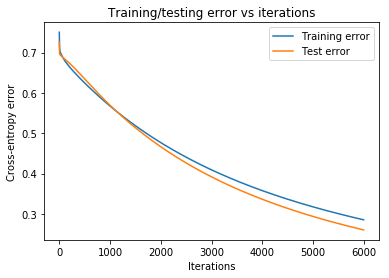

In [317]:
plot_errors(tr_errors, test_errors)

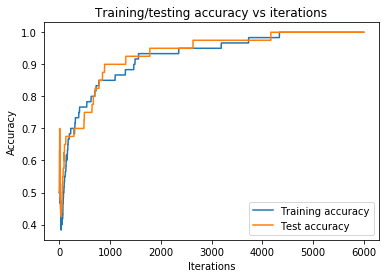

In [318]:
plot_acc(tr_a, test_a)

In [312]:
weights

array([ -3.46509188,  10.93942539,   9.961075  , -14.37951616,
         6.21897953, -13.81354875])

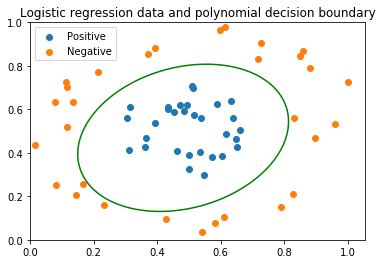

In [315]:
pos = plt.scatter(x_train[np.where(y_train>0),1], x_train[np.where(y_train>0), 2])
neg = plt.scatter(x_train[np.where(y_train==0),1], x_train[np.where(y_train==0), 2])
plt.legend((pos, neg),('Positive', 'Negative'))
plt.title("Logistic regression data and polynomial decision boundary")
draw_boundary(weights)

We can see that our model trained on input data with added polynomial interactions between the features is able to fit the data very well. 